# FIFA World Cup 2026 Simulation

## Authors: Sahib Kamoh, Noman Akram
### Group 27




### Import libraries.

In [501]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score, confusion_matrix

In [502]:
url = "https://raw.githubusercontent.com/5ah/Football-Predictor/main/results.csv"
matches_df = pd.read_csv(url, sep=',')
url2 = "https://raw.githubusercontent.com/5ah/Football-Predictor/main/countries.csv"
countries_df = pd.read_csv(url2, sep=',')
url3 = "https://raw.githubusercontent.com/5ah/Football-Predictor/main/shootouts.csv"
shootouts_df = pd.read_csv(url3, sep=',')
url4 = "https://raw.githubusercontent.com/5ah/Football-Predictor/main/goalscorers.csv"
goal_scorers = pd.read_csv(url4, sep=',')

### Display match data.




In [503]:
matches_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
45095,2023-10-17,Lithuania,Hungary,2,2,UEFA Euro qualification,Kaunas,Lithuania,False
45096,2023-10-17,Finland,Kazakhstan,1,2,UEFA Euro qualification,Helsinki,Finland,False
45097,2023-10-17,Northern Ireland,Slovenia,0,1,UEFA Euro qualification,Belfast,Northern Ireland,False
45098,2023-10-17,San Marino,Denmark,1,2,UEFA Euro qualification,Serravalle,San Marino,False


In [504]:
matches_df.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

### Display shootout dataframe.

In [505]:
shootouts_df.head()

,date,home_team,away_team,winner
0,1967-08-22,India,Taiwan,Taiwan
1,1971-11-14,South Korea,Vietnam Republic,South Korea
2,1972-05-07,South Korea,Iraq,Iraq
3,1972-05-17,Thailand,South Korea,South Korea
4,1972-05-19,Thailand,Cambodia,Thailand


In [506]:
shootouts_df.isna().sum()

date         0
home_team    0
away_team    0
winner       0
dtype: int64

### Display Goal Scorers dataframe.

In [507]:
goal_scorers.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [508]:
goal_scorers.isna().sum()

date           0
home_team      0
away_team      0
team           0
scorer        49
minute       258
own_goal       0
penalty        0
dtype: int64

In [509]:
countries_df.head()

,Country
0,Argentina
1,France
2,Brazil
3,England
4,Belgium


### Filter top 50 teams.

In [510]:
valid_countries = countries_df['Country'].tolist()
matches = matches_df[(matches_df['home_team'].isin(valid_countries)) | (matches_df['away_team'].isin(valid_countries))]
matches

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
45092,2023-10-17,England,Italy,3,1,UEFA Euro qualification,London,England,False
45093,2023-10-17,Malta,Ukraine,1,3,UEFA Euro qualification,Ta' Qali,Malta,False
45094,2023-10-17,Serbia,Montenegro,3,1,UEFA Euro qualification,Belgrade,Serbia,False
45095,2023-10-17,Lithuania,Hungary,2,2,UEFA Euro qualification,Kaunas,Lithuania,False


### Filter out matches before 2018.

In [511]:
# Convert 'date' to datetime format
matches['date'] = pd.to_datetime(matches['date'])

# Filter the DataFrame for matches from 2018 and onwards
matches = matches[matches['date'].dt.year >= 2018]

matches

<ipython-input-511-725eda910fa7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches['date'] = pd.to_datetime(matches['date'])


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
39994,2018-01-07,Estonia,Sweden,1,1,Friendly,Abu Dhabi,United Arab Emirates,True
39995,2018-01-11,Denmark,Sweden,0,1,Friendly,Abu Dhabi,United Arab Emirates,True
39998,2018-01-13,Morocco,Mauritania,4,0,African Nations Championship,Casablanca,Morocco,False
40004,2018-01-15,Nigeria,Rwanda,0,0,African Nations Championship,Tangier,Morocco,True
40006,2018-01-16,Cameroon,Congo,0,1,African Nations Championship,Agadir,Morocco,True
...,...,...,...,...,...,...,...,...,...
45092,2023-10-17,England,Italy,3,1,UEFA Euro qualification,London,England,False
45093,2023-10-17,Malta,Ukraine,1,3,UEFA Euro qualification,Ta' Qali,Malta,False
45094,2023-10-17,Serbia,Montenegro,3,1,UEFA Euro qualification,Belgrade,Serbia,False
45095,2023-10-17,Lithuania,Hungary,2,2,UEFA Euro qualification,Kaunas,Lithuania,False


### Assign winner of match-ups or TIE using the scorer and penalty shootout dataframes.

In [512]:
matches['date'] = pd.to_datetime(matches['date'])
shootouts_df['date'] = pd.to_datetime(shootouts_df['date'])

# Merge the DataFrames on common columns
merged_df = pd.merge(matches, shootouts_df, on=['date', 'home_team', 'away_team'], how='left')

# Function to determine the winner
def determine_winner(row):
    if row['home_score'] == row['away_score']:  # Check if the match is a tie
        return row['winner'] if pd.notnull(row['winner']) else 'TIE'
    else:
        # Determine the winner based on scores
        return row['home_team'] if row['home_score'] > row['away_score'] else row['away_team']

# Apply the function to each row
merged_df['winner'] = merged_df.apply(determine_winner, axis=1)
matches = merged_df
matches

<ipython-input-512-de9cea1181c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches['date'] = pd.to_datetime(matches['date'])


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner
0,2018-01-07,Estonia,Sweden,1,1,Friendly,Abu Dhabi,United Arab Emirates,True,TIE
1,2018-01-11,Denmark,Sweden,0,1,Friendly,Abu Dhabi,United Arab Emirates,True,Sweden
2,2018-01-13,Morocco,Mauritania,4,0,African Nations Championship,Casablanca,Morocco,False,Morocco
3,2018-01-15,Nigeria,Rwanda,0,0,African Nations Championship,Tangier,Morocco,True,TIE
4,2018-01-16,Cameroon,Congo,0,1,African Nations Championship,Agadir,Morocco,True,Congo
...,...,...,...,...,...,...,...,...,...,...
2369,2023-10-17,England,Italy,3,1,UEFA Euro qualification,London,England,False,England
2370,2023-10-17,Malta,Ukraine,1,3,UEFA Euro qualification,Ta' Qali,Malta,False,Ukraine
2371,2023-10-17,Serbia,Montenegro,3,1,UEFA Euro qualification,Belgrade,Serbia,False,Serbia
2372,2023-10-17,Lithuania,Hungary,2,2,UEFA Euro qualification,Kaunas,Lithuania,False,TIE


### An example of a match with a tied score-line but won in penalty shootout.

In [513]:
desired_date = '2022-12-18'
selected_row = matches.loc[merged_df['date'] == desired_date]
selected_row

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner
2065,2022-12-18,Argentina,France,3,3,FIFA World Cup,Lusail,Qatar,True,Argentina


### Generating stats from the results of match-ups.

Generate the following stats:

*   Average goal differential
*   Clean sheet rate
*   Performance against higher ranked teams,
*   Average goals scored/conceded
*   Recent form

Then appened stats to every team in the countries dataframe.

In [514]:
def calculate_stats(team, results_df, countries_df, recent_games_count=5):
    # Filter the results for the specified team
    team_games = results_df[(results_df['home_team'] == team) | (results_df['away_team'] == team)]

    # Total games played
    total_games = len(team_games)

    # Wins are counted directly from the 'winner' column
    wins = sum(team_games['winner'] == team)

    # Calculate win rate
    win_rate = wins / total_games if total_games > 0 else 0

    # Get the rank of the team based on its position in countries_df
    team_rank = countries_df.index[countries_df['Country'] == team].tolist()[0]

    # Initialize the count for wins against higher-ranked teams
    higher_ranked_wins = 0

    # Goals scored and conceded
    goals_scored = 0
    goals_conceded = 0

    # Clean sheets count
    clean_sheets = 0

    for index, row in team_games.iterrows():
        # Determine if the team is playing at home or away
        home = row['home_team'] == team

        # Update goals scored and conceded
        if home:
            goals_scored += row['home_score']
            goals_conceded += row['away_score']
            if row['away_score'] == 0:
                clean_sheets += 1
        else:
            goals_scored += row['away_score']
            goals_conceded += row['home_score']
            if row['home_score'] == 0:
                clean_sheets += 1

        # Check if the opponent is a higher-ranked team and if the team won
        opponent = row['away_team'] if home else row['home_team']
        if opponent in countries_df['Country'].values:
            opponent_rank = countries_df.index[countries_df['Country'] == opponent].tolist()[0]
            if row['winner'] == team and opponent_rank < team_rank:
                higher_ranked_wins += 1

    # Calculate statistics
    average_goal_differential = (goals_scored - goals_conceded) / total_games if total_games > 0 else 0
    clean_sheets_rate = clean_sheets / total_games if total_games > 0 else 0
    performance_against_higher_ranked = higher_ranked_wins / total_games if total_games > 0 else 0
    average_goals_scored = goals_scored / total_games if total_games > 0 else 0
    average_goals_conceded = goals_conceded / total_games if total_games > 0 else 0
    recent_form = sum(team_games.tail(recent_games_count)['winner'] == team) / recent_games_count if recent_games_count > 0 else 0

    # Compile statistics into a dictionary
    stats = {
        "Win Rate": win_rate,
        "Average Goal Differential": average_goal_differential,
        "Clean Sheets Rate": clean_sheets_rate,
        "Performance Against Higher Ranked Teams": performance_against_higher_ranked,
        "Average Goals Scored": average_goals_scored,
        "Average Goals Conceded": average_goals_conceded,
        "Recent Form": recent_form
    }

    return stats


# Calculate the stats for each team in the countries list
stats = {team: calculate_stats(team, matches, countries_df) for team in countries_df['Country']}

# Convert the stats to a DataFrame
stats_df = pd.DataFrame.from_dict(stats, orient='index')
stats_df.reset_index(inplace=True)
stats_df.rename(columns={'index': 'Country'}, inplace=True)

# Round numeric columns to 5 decimal points
numeric_columns = stats_df.select_dtypes(include=['float64']).columns
stats_df[numeric_columns] = stats_df[numeric_columns].round(5)

# Add a column for row number
stats_df['Rank'] = stats_df.index + 1  # Add 1 to start numbering from 1

# Merge the stats with the countries DataFrame
countries_stats_df = pd.merge(countries_df, stats_df, on='Country', how='left')
countries_stats_df.head()

,Country,Win Rate,Average Goal Differential,Clean Sheets Rate,Performance Against Higher Ranked Teams,Average Goals Scored,Average Goals Conceded,Recent Form,Rank
0,Argentina,0.70833,1.33333,0.59722,0.00000,2.02778,0.69444,1.0,1
1,France,0.68421,1.26316,0.42105,0.01316,2.10526,0.84211,0.8,2
2,Brazil,0.71831,1.60563,0.60563,0.02817,2.11268,0.50704,0.4,3
3,England,0.68000,1.65333,0.53333,0.00000,2.34667,0.69333,0.8,4
4,Belgium,0.70833,1.62500,0.45833,0.05556,2.45833,0.83333,0.8,5


### Merge the match result dataframe and the countries with stats dataframe.

In [515]:
data = pd.merge(matches, countries_stats_df, how='inner', left_on='home_team', right_on='Country')
data = pd.merge(data, countries_stats_df, how='inner', left_on='away_team', right_on='Country', suffixes=('_home', '_away'))
data

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,...,Rank_home,Country_away,Win Rate_away,Average Goal Differential_away,Clean Sheets Rate_away,Performance Against Higher Ranked Teams_away,Average Goals Scored_away,Average Goals Conceded_away,Recent Form_away,Rank_away
0,2018-01-11,Denmark,Sweden,0,1,Friendly,Abu Dhabi,United Arab Emirates,True,Sweden,...,19,Sweden,0.49333,0.38667,0.40000,0.08000,1.45333,1.06667,0.4,23
1,2020-11-11,Denmark,Sweden,2,0,Friendly,Brondbyvester,Denmark,False,Denmark,...,19,Sweden,0.49333,0.38667,0.40000,0.08000,1.45333,1.06667,0.4,23
2,2018-06-27,Mexico,Sweden,0,3,FIFA World Cup,Ekaterinburg,Russia,True,Sweden,...,12,Sweden,0.49333,0.38667,0.40000,0.08000,1.45333,1.06667,0.4,23
3,2022-11-16,Mexico,Sweden,1,2,Friendly,Girona,Spain,True,Sweden,...,12,Sweden,0.49333,0.38667,0.40000,0.08000,1.45333,1.06667,0.4,23
4,2018-09-06,Austria,Sweden,2,0,Friendly,Vienna,Austria,False,Austria,...,25,Sweden,0.49333,0.38667,0.40000,0.08000,1.45333,1.06667,0.4,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,2020-10-11,Russia,Turkey,1,1,UEFA Nations League,Moscow,Russia,False,TIE,...,39,Turkey,0.47692,0.60000,0.38462,0.10769,1.81538,1.21538,0.6,38
954,2020-09-06,Serbia,Turkey,0,0,UEFA Nations League,Belgrade,Serbia,False,TIE,...,29,Turkey,0.47692,0.60000,0.38462,0.10769,1.81538,1.21538,0.6,38
955,2018-09-10,Sweden,Turkey,2,3,UEFA Nations League,Stockholm,Sweden,False,Turkey,...,23,Turkey,0.47692,0.60000,0.38462,0.10769,1.81538,1.21538,0.6,38
956,2021-06-20,Switzerland,Turkey,3,1,UEFA Euro,Baku,Azerbaijan,True,Switzerland,...,14,Turkey,0.47692,0.60000,0.38462,0.10769,1.81538,1.21538,0.6,38


### Generate EDAs to show correlation between data to help decide on what machine learning model to choose

In [516]:
data.isna().sum()

date                                            0
home_team                                       0
away_team                                       0
home_score                                      0
away_score                                      0
tournament                                      0
city                                            0
country                                         0
neutral                                         0
winner                                          0
Country_home                                    0
Win Rate_home                                   0
Average Goal Differential_home                  0
Clean Sheets Rate_home                          0
Performance Against Higher Ranked Teams_home    0
Average Goals Scored_home                       0
Average Goals Conceded_home                     0
Recent Form_home                                0
Rank_home                                       0
Country_away                                    0


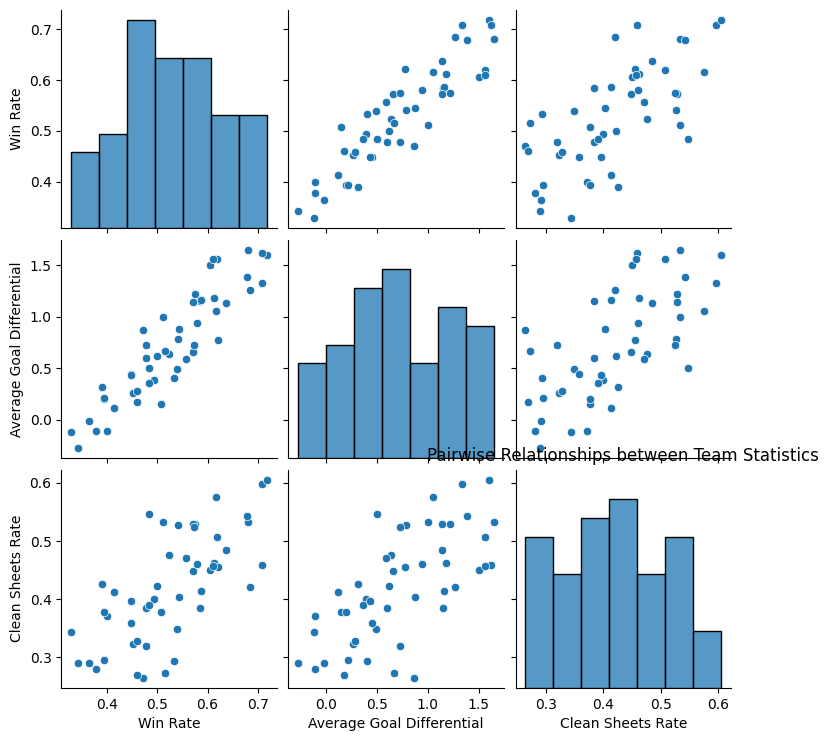

In [517]:
# Pairwise Relationships and Scatter Plots
# Selecting a subset of features for pairwise relationship analysis
pairwise_features = ['Win Rate', 'Average Goal Differential', 'Clean Sheets Rate']
sns.pairplot(countries_stats_df[pairwise_features])
plt.title('Pairwise Relationships between Team Statistics')
plt.show()

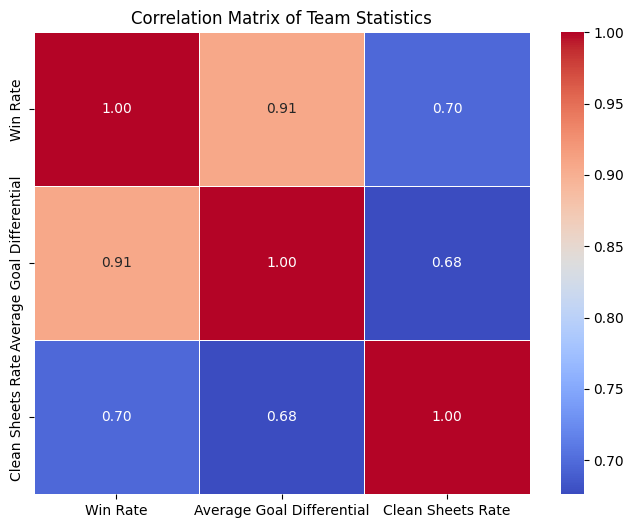

In [518]:
# Correlation Analysis
correlation_matrix = countries_stats_df[pairwise_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Team Statistics')
plt.show()

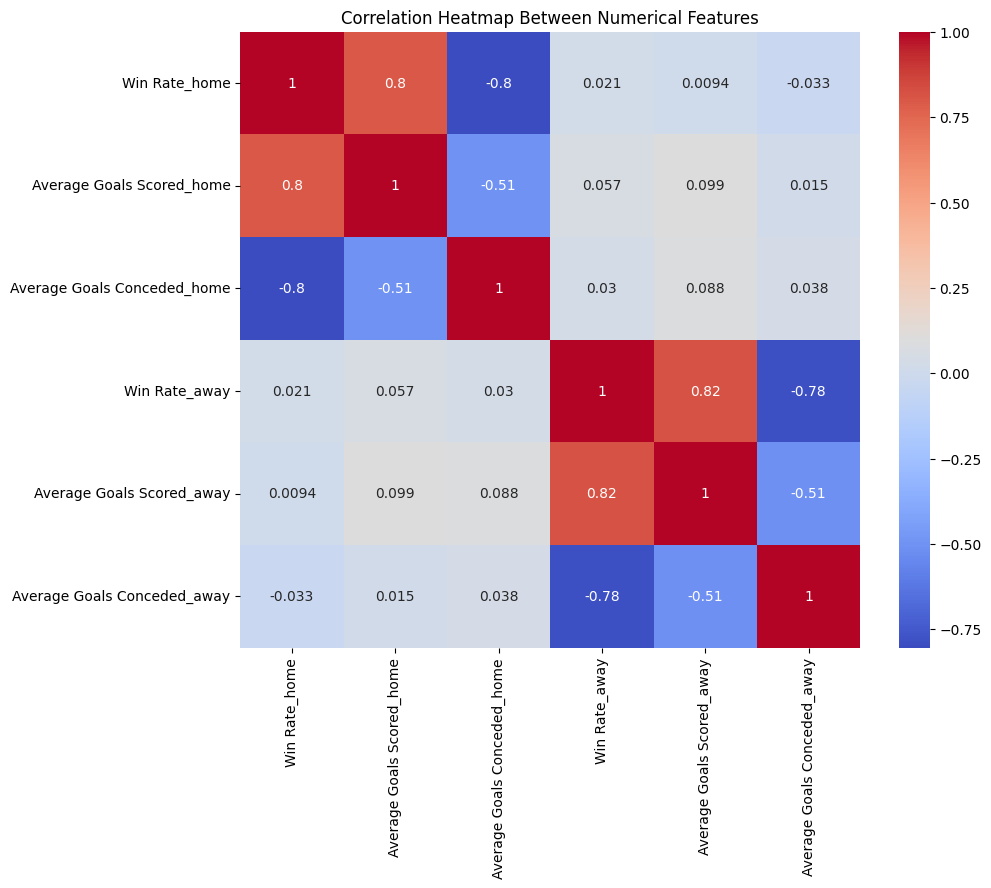

In [519]:
numerical_features = ['Win Rate_home', 'Average Goals Scored_home', 'Average Goals Conceded_home',
                      'Win Rate_away', 'Average Goals Scored_away', 'Average Goals Conceded_away']
correlation_data = data[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap Between Numerical Features')
plt.show()

### Data cleaning and preprocessing.

Assign 1 if the home team wins, 0 if away team wins and/or if the match ends in a draw.

In [520]:
# Map winner to binary outcome: 1 for home team win, 0 for away team wins or if match results in a draw
data['winner_binary'] = data.apply(
    lambda row: 1 if row['winner'] == row['home_team'] else 0, axis=1
)

In [521]:
data

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,...,Country_away,Win Rate_away,Average Goal Differential_away,Clean Sheets Rate_away,Performance Against Higher Ranked Teams_away,Average Goals Scored_away,Average Goals Conceded_away,Recent Form_away,Rank_away,winner_binary
0,2018-01-11,Denmark,Sweden,0,1,Friendly,Abu Dhabi,United Arab Emirates,True,Sweden,...,Sweden,0.49333,0.38667,0.40000,0.08000,1.45333,1.06667,0.4,23,0
1,2020-11-11,Denmark,Sweden,2,0,Friendly,Brondbyvester,Denmark,False,Denmark,...,Sweden,0.49333,0.38667,0.40000,0.08000,1.45333,1.06667,0.4,23,1
2,2018-06-27,Mexico,Sweden,0,3,FIFA World Cup,Ekaterinburg,Russia,True,Sweden,...,Sweden,0.49333,0.38667,0.40000,0.08000,1.45333,1.06667,0.4,23,0
3,2022-11-16,Mexico,Sweden,1,2,Friendly,Girona,Spain,True,Sweden,...,Sweden,0.49333,0.38667,0.40000,0.08000,1.45333,1.06667,0.4,23,0
4,2018-09-06,Austria,Sweden,2,0,Friendly,Vienna,Austria,False,Austria,...,Sweden,0.49333,0.38667,0.40000,0.08000,1.45333,1.06667,0.4,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,2020-10-11,Russia,Turkey,1,1,UEFA Nations League,Moscow,Russia,False,TIE,...,Turkey,0.47692,0.60000,0.38462,0.10769,1.81538,1.21538,0.6,38,0
954,2020-09-06,Serbia,Turkey,0,0,UEFA Nations League,Belgrade,Serbia,False,TIE,...,Turkey,0.47692,0.60000,0.38462,0.10769,1.81538,1.21538,0.6,38,0
955,2018-09-10,Sweden,Turkey,2,3,UEFA Nations League,Stockholm,Sweden,False,Turkey,...,Turkey,0.47692,0.60000,0.38462,0.10769,1.81538,1.21538,0.6,38,0
956,2021-06-20,Switzerland,Turkey,3,1,UEFA Euro,Baku,Azerbaijan,True,Switzerland,...,Turkey,0.47692,0.60000,0.38462,0.10769,1.81538,1.21538,0.6,38,1


### Getting list of features ready for data split and training.

In [522]:
features = [
    'Win Rate_home', 'Average Goal Differential_home', 'Clean Sheets Rate_home',
    'Performance Against Higher Ranked Teams_home', 'Average Goals Scored_home',
    'Average Goals Conceded_home',
    'Win Rate_away', 'Average Goal Differential_away', 'Clean Sheets Rate_away',
    'Performance Against Higher Ranked Teams_away', 'Average Goals Scored_away',
    'Average Goals Conceded_away'
]
target = 'winner_binary'

### Split the data into training and testing.

In [523]:
data['date'] = pd.to_datetime(data['date'])
data_before_2022 = data[data['date'].dt.year < 2022]
data_after_2022 = data[data['date'].dt.year >= 2022]

In [524]:
X_train = data_before_2022[features]
y_train = data_before_2022[target]

X_test = data_after_2022[features]
y_test = data_after_2022[target]

### Scale data if there are any inconsistencies.

In [525]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model raining and testing

Use Gridsearch on SVC to get the best parameters



In [526]:
param_grid = {
    'C': [0.01, 0.1, 1],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Create an SVM model
svc = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Display the best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate on Test Data
X_test_scaled = scaler.transform(X_test)  # Scale test data
test_accuracy = grid_search.score(X_test_scaled, y_test)
print(f'Test Accuracy with Best Parameters: {test_accuracy}')

Best Parameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
Test Accuracy with Best Parameters: 0.5901639344262295


### Train the SVC model with the best parameters

In [527]:
svm = SVC(C=0.1, gamma='auto', kernel='rbf')
svm.fit(X_train_scaled, y_train)

SVC(C=0.1, gamma='auto')

### Accuracy and Confusion Matrix

In [528]:
y_pred = svm.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy_svm)
print("Classification Report:")
print(report)

Accuracy: 0.5901639344262295
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.74      0.66       164
           1       0.58      0.41      0.48       141

    accuracy                           0.59       305
   macro avg       0.59      0.58      0.57       305
weighted avg       0.59      0.59      0.58       305



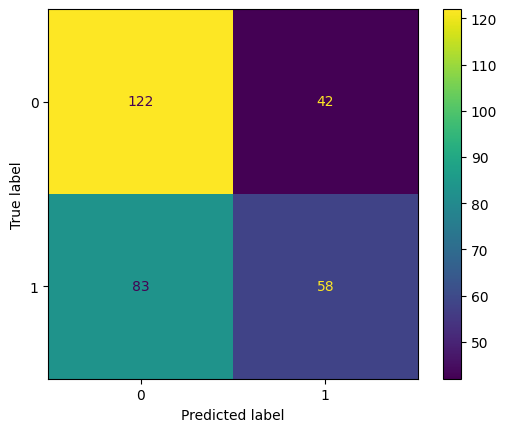

In [529]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

Use Gridsearch on Logistic Regression to get the best parameters




In [530]:
# Define a corrected parameter grid for logistic regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Penalty term
    'solver': ['liblinear']  # Solver algorithm
}


# Create a Logistic Regression model
lr = LogisticRegression()

# Perform grid search with cross-validation
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train_scaled, y_train)


# Display the best parameters
print("Best Parameters (Logistic Regression):", grid_search_lr.best_params_)

# Evaluate on Test Data
test_accuracy_lr = grid_search_lr.score(X_test_scaled, y_test)
print(f'Test Accuracy with Best Parameters (Logistic Regression): {test_accuracy_lr}')

Best Parameters (Logistic Regression): {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Test Accuracy with Best Parameters (Logistic Regression): 0.5770491803278689


### Train the Logistic Regression model with the best parameters

In [531]:
logistic_model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

### Accuracy and Confusion Matrix.

In [532]:
y_pred = logistic_model.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy_lr)
print("Classification Report:")
print(report)

Accuracy: 0.6032786885245902
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.71      0.66       164
           1       0.59      0.48      0.53       141

    accuracy                           0.60       305
   macro avg       0.60      0.59      0.59       305
weighted avg       0.60      0.60      0.60       305



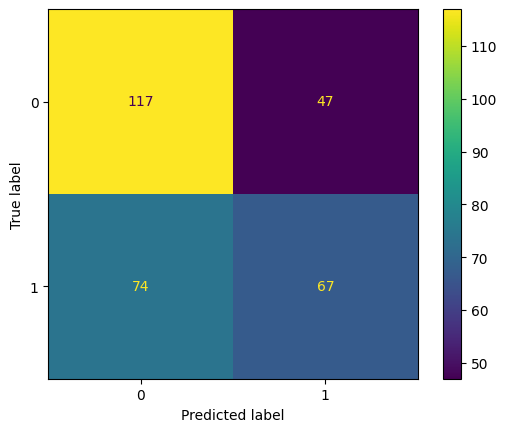

In [533]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### Use Gridsearch on K neighbours classifier to get the best parameters.

In [534]:
# Define parameter grid for grid search
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2]  # Power parameter for the Minkowski metric
}

# Create a KNN model
knn = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_scaled, y_train)

# Display the best parameters
print("Best Parameters (KNN):", grid_search_knn.best_params_)

# Evaluate on Test Data
test_accuracy_knn = grid_search_knn.score(X_test_scaled, y_test)
print(f'Test Accuracy with Best Parameters (KNN): {test_accuracy_knn}')

Best Parameters (KNN): {'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
Test Accuracy with Best Parameters (KNN): 0.6163934426229508


### Train the KNN model with the best parameters.

In [535]:
model_knn = KNeighborsClassifier(n_neighbors=9, p=2, weights='uniform')
model_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=9)

### Accuracy and Confusion Matrix.

In [536]:
y_pred = model_knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy_knn)
print("Classification Report:")
print(report)

Accuracy: 0.6163934426229508
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.69      0.66       164
           1       0.60      0.53      0.56       141

    accuracy                           0.62       305
   macro avg       0.61      0.61      0.61       305
weighted avg       0.61      0.62      0.61       305



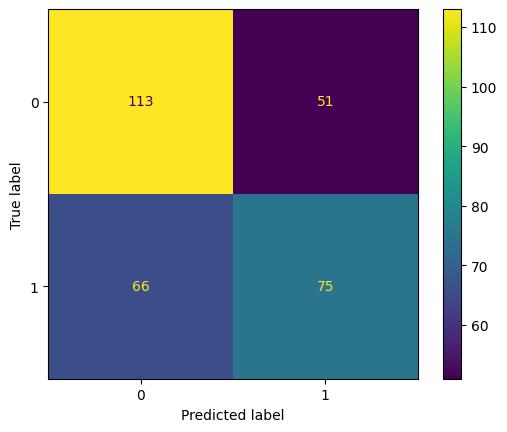

In [537]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

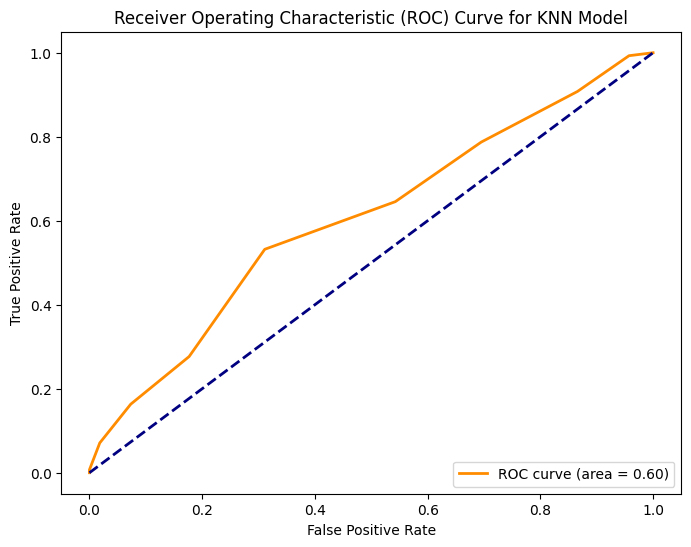

In [538]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Ensure that your KNN model and the test data (X_test_scaled, y_test) are defined and available in your workspace

# Compute ROC curve and area under the curve
fpr, tpr, thresholds = roc_curve(y_test, grid_search_knn.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN Model')
plt.legend(loc="lower right")
plt.show()

### Comparing the models.

In [539]:
accuracy_table = {
    'Machine Learning Model': ['SVM', 'Logistic Regression', 'K Nearest Neighbors'],
    'Accuracy': [accuracy_svm, accuracy_lr, accuracy_knn]
}

acc = pd.DataFrame(accuracy_table)
print(acc.to_string())

  Machine Learning Model  Accuracy
0                    SVM  0.590164
1    Logistic Regression  0.603279
2    K Nearest Neighbors  0.616393


# World Cup Simulation.

### Create match up and train models.

In [540]:
# Function to create a matchup DataFrame based on the provided teams and the stats DataFrame
def create_matchup(team_home, team_away, stats_df):
    # Get the statistics for the home team
    team_home_stats_df = stats_df[stats_df['Country'] == team_home]
    team_away_stats_df = stats_df[stats_df['Country'] == team_away]

    # Check if the DataFrames are empty and handle the case where the team is not found
    if team_home_stats_df.empty or team_away_stats_df.empty:
        raise ValueError(f"Team data not found. Ensure that team names are spelled correctly. Team Home: {team_home}, Team Away: {team_away}")

    # Extract the first row as the team's stats
    team_home_stats = team_home_stats_df.iloc[0]
    team_away_stats = team_away_stats_df.iloc[0]

    # Create a DataFrame for the match with the selected features
    matchup_data = pd.DataFrame({
        'Win Rate_home': [team_home_stats['Win Rate']],
        'Average Goal Differential_home': [team_home_stats['Average Goal Differential']],
        'Clean Sheets Rate_home': [team_home_stats['Clean Sheets Rate']],
        'Performance Against Higher Ranked Teams_home': [team_home_stats['Performance Against Higher Ranked Teams']],
        'Average Goals Scored_home': [team_home_stats['Average Goals Scored']],
        'Average Goals Conceded_home': [team_home_stats['Average Goals Conceded']],
        'Recent Form_home': [team_home_stats['Recent Form']],
        'Win Rate_away': [team_away_stats['Win Rate']],
        'Average Goal Differential_away': [team_away_stats['Average Goal Differential']],
        'Clean Sheets Rate_away': [team_away_stats['Clean Sheets Rate']],
        'Performance Against Higher Ranked Teams_away': [team_away_stats['Performance Against Higher Ranked Teams']],
        'Average Goals Scored_away': [team_away_stats['Average Goals Scored']],
        'Average Goals Conceded_away': [team_away_stats['Average Goals Conceded']],
        'Recent Form_away': [team_away_stats['Recent Form']]
    })

    return matchup_data

def interpret_prediction(home_team, away_team, prediction):
    if prediction == 1:
        return home_team
    else:
        return away_team  # Or 'Draw' if you want to treat 0 as a draw

def print_previous_matchups(data, team1, team2):
    # Filter the dataset for matches where the two teams faced each other
    matchups = data[((data['home_team'] == team1) & (data['away_team'] == team2)) |
                    ((data['home_team'] == team2) & (data['away_team'] == team1))]

    # Check if there are any previous matchups
    if matchups.empty:
        print(f"No previous matchups found between {team1} and {team2}.")
    else:
        print(f"Previous matchups between {team1} and {team2}:")
        print(matchups)

# Make sure these feature names match exactly with your dataframe columns
features = [
    'Win Rate_home', 'Average Goal Differential_home', 'Clean Sheets Rate_home',
    'Performance Against Higher Ranked Teams_home', 'Average Goals Scored_home',
    'Average Goals Conceded_home', 'Recent Form_home', 'Win Rate_away',
    'Average Goal Differential_away', 'Clean Sheets Rate_away',
    'Performance Against Higher Ranked Teams_away', 'Average Goals Scored_away',
    'Average Goals Conceded_away', 'Recent Form_away'
]
target = 'winner_binary'

# Splitting the data into features (X) and target (y)
X = data[features]
y = data[target]

logistic_model = LogisticRegression()
svc_model = SVC()
knn_model = KNeighborsClassifier()

# Create the matchup
team_A = 'Argentina'
team_B = 'France'
matchup = create_matchup(team_A, team_B, countries_stats_df)
print_previous_matchups(matches, team_A, team_B)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
logistic_model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
logistic_model.fit(X_train_scaled, y_train)

# Support Vector Classifier
svc_model = SVC(C=0.1, gamma='auto', kernel='rbf')
svc_model.fit(X_train_scaled, y_train)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=9, p=2, weights='uniform')
knn_model.fit(X_train_scaled, y_train)

# Feature scaling (if your model was trained with scaled features)
matchup_scaled = scaler.transform(matchup)

# Make predictions
logistic_prediction = logistic_model.predict(matchup_scaled)[0]  # [0] to get the first element of the prediction
svc_prediction = svc_model.predict(matchup_scaled)[0]
knn_prediction = knn_model.predict(matchup_scaled)[0]

# Print the predicted winners
print('Logistic Regression Predicted Winner:', interpret_prediction(team_A, team_B, logistic_prediction))
print('Support Vector Classification Predicted Winner:', interpret_prediction(team_A, team_B, svc_prediction))
print('K-Nearest Neighbors Predicted Winner:', interpret_prediction(team_A, team_B, knn_prediction))

Previous matchups between Argentina and France:
           date  home_team  away_team  home_score  away_score      tournament  \
198  2018-06-30     France  Argentina           4           3  FIFA World Cup   
2065 2022-12-18  Argentina     France           3           3  FIFA World Cup   

        city country  neutral     winner  
198    Kazan  Russia     True     France  
2065  Lusail   Qatar     True  Argentina  
Logistic Regression Predicted Winner: Argentina
Support Vector Classification Predicted Winner: France
K-Nearest Neighbors Predicted Winner: France


# Predict World Cup 2026 Winner

### Use KNN model.

In [541]:
model = knn_model

### Define functions to simulate Group Stages and Knockout Stages.

In [542]:
def simulate_group_stage(teams, model, scaler, stats_df):
    results = {}
    for i in range(len(teams)):
        for j in range(i+1, len(teams)):
            home_team, away_team = teams[i], teams[j]
            matchup = create_matchup(home_team, away_team, stats_df)
            matchup_scaled = scaler.transform(matchup)
            prediction = model.predict(matchup_scaled)[0]
            winner = interpret_prediction(home_team, away_team, prediction)
            print(f"Match: {home_team} vs {away_team}, Winner: {winner}")
            results[(home_team, away_team)] = winner
    return results

def simulate_knockout_matchups(bracket, model, scaler, stats_df):
    winners = {}
    for match_id, (home_team, away_team) in bracket.items():
        matchup = create_matchup(home_team, away_team, stats_df)
        matchup_scaled = scaler.transform(matchup)
        prediction = model.predict(matchup_scaled)[0]
        winner = interpret_prediction(home_team, away_team, prediction)
        print(f"Match {match_id}: {home_team} vs {away_team}, Winner: {winner}")
        winners[match_id] = winner
    return winners

### Create Group Stage bracket.

In [543]:
groups = {
    'A': ['Argentina', 'Mexico', 'Denmark', 'Austria'],
    'B': ['France', 'United States', 'Senegal', 'Peru'],
    'C': ['Australia', 'Morocco', 'Iran', 'Belgium'],
    'D': ['England', 'Switzerland', 'Portugal', 'Wales'],
    'E': ['Ukraine', 'Uruguay', 'Sweden', 'Serbia'],
    'F': ['Brazil', 'Germany', 'South Korea', 'Hungary'],
    'G': ['Netherlands', 'Croatia', 'Colombia', 'Poland'],
    'H': ['Spain', 'Italy', 'Japan', 'Tunisia']
}

### Simulate Group Stage matches and return winners.

In [544]:
group_stage_results = {}
for group, teams in groups.items():
    group_stage_results.update(simulate_group_stage(teams, model, scaler, countries_stats_df))

print("\n\nGroup Stage Winners: \n")
group_winners = {}
for group, teams in groups.items():
    win_counts = {team: 0 for team in teams}
    for (home, away), winner in group_stage_results.items():
        if home in teams and away in teams:
            win_counts[winner] += 1
    top_two_teams = sorted(win_counts, key=win_counts.get, reverse=True)[:2]
    group_winners[group] = top_two_teams
    print(f"Group {group}: {top_two_teams}")

Match: Argentina vs Mexico, Winner: Argentina
Match: Argentina vs Denmark, Winner: Denmark
Match: Argentina vs Austria, Winner: Argentina
Match: Mexico vs Denmark, Winner: Denmark
Match: Mexico vs Austria, Winner: Austria
Match: Denmark vs Austria, Winner: Denmark
Match: France vs United States, Winner: France
Match: France vs Senegal, Winner: France
Match: France vs Peru, Winner: France
Match: United States vs Senegal, Winner: United States
Match: United States vs Peru, Winner: United States
Match: Senegal vs Peru, Winner: Peru
Match: Australia vs Morocco, Winner: Morocco
Match: Australia vs Iran, Winner: Iran
Match: Australia vs Belgium, Winner: Belgium
Match: Morocco vs Iran, Winner: Iran
Match: Morocco vs Belgium, Winner: Belgium
Match: Iran vs Belgium, Winner: Belgium
Match: England vs Switzerland, Winner: England
Match: England vs Portugal, Winner: Portugal
Match: England vs Wales, Winner: England
Match: Switzerland vs Portugal, Winner: Portugal
Match: Switzerland vs Wales, Winne

### Create Round of 16 Bracket

In [545]:
round_of_16_bracket = {
    'A': [group_winners['A'][0], group_winners['B'][1]],
    'B': [group_winners['B'][0], group_winners['A'][1]],
    'C': [group_winners['C'][0], group_winners['D'][1]],
    'D': [group_winners['D'][0], group_winners['C'][1]],
    'E': [group_winners['E'][0], group_winners['F'][1]],
    'F': [group_winners['F'][0], group_winners['E'][1]],
    'G': [group_winners['G'][0], group_winners['H'][1]],
    'H': [group_winners['H'][0], group_winners['G'][1]]
}

### Simulate Round of 16 matches and return winners.

In [546]:
round_of_16_winners = {}
print("\nRound of 16 Matchups and Winners: \n")
for match_id, (home_team, away_team) in round_of_16_bracket.items():
    matchup = create_matchup(home_team, away_team, countries_stats_df)
    matchup_scaled = scaler.transform(matchup)
    prediction = model.predict(matchup_scaled)[0]
    winner = interpret_prediction(home_team, away_team, prediction)
    print(f"Match {match_id}: {home_team} vs {away_team}, Winner: {winner}")
    round_of_16_winners[match_id] = winner

print("\n\nRound of 16 Winners: \n")
for match_id, winner in round_of_16_winners.items():
    print(f"Match {match_id}: {winner}")



Round of 16 Matchups and Winners: 

Match A: Denmark vs United States, Winner: United States
Match B: France vs Argentina, Winner: France
Match C: Belgium vs England, Winner: Belgium
Match D: Portugal vs Iran, Winner: Iran
Match E: Serbia vs South Korea, Winner: South Korea
Match F: Brazil vs Uruguay, Winner: Brazil
Match G: Colombia vs Tunisia, Winner: Tunisia
Match H: Spain vs Poland, Winner: Spain


Round of 16 Winners: 

Match A: United States
Match B: France
Match C: Belgium
Match D: Iran
Match E: South Korea
Match F: Brazil
Match G: Tunisia
Match H: Spain


### Create Quarter Finals bracket

In [547]:
quarter_finals_bracket = {
    'A': [round_of_16_winners['A'], round_of_16_winners['B']],
    'B': [round_of_16_winners['C'], round_of_16_winners['D']],
    'C': [round_of_16_winners['E'], round_of_16_winners['F']],
    'D': [round_of_16_winners['G'], round_of_16_winners['H']],
}

### Simulate Quarter Finals matches and return winners.

In [548]:
# Quarter-finals simulation
print("\nQuarter-Finals Matchups and Winners:\n")
quarter_finals_winners = simulate_knockout_matchups(quarter_finals_bracket, model, scaler, countries_stats_df)

# Print Quarter-Finals winners
print("\n\nQuarter-Finals Winners:\n")
for match_id, winner in quarter_finals_winners.items():
    print(f"Match {match_id}: {winner}")


Quarter-Finals Matchups and Winners:

Match A: United States vs France, Winner: France
Match B: Belgium vs Iran, Winner: Belgium
Match C: South Korea vs Brazil, Winner: Brazil
Match D: Tunisia vs Spain, Winner: Tunisia


Quarter-Finals Winners:

Match A: France
Match B: Belgium
Match C: Brazil
Match D: Tunisia


### Create Semi Finals bracket.

In [549]:
semi_finals_bracket = {
    'A': [quarter_finals_winners['A'], quarter_finals_winners['B']],
    'B': [quarter_finals_winners['C'], quarter_finals_winners['D']],
}

### Simulate Semi Finals matches and return winners.

In [550]:
# Semi-finals simulation
print("\nSemi-Finals Matchups and Winners:\n")
semi_finals_winners = simulate_knockout_matchups(semi_finals_bracket, model, scaler, countries_stats_df)

# Print Semi-Finals winners
print("\n\nSemi-Finals Winners:")
for match_id, winner in semi_finals_winners.items():
    print(f"Match {match_id}: {winner}")



Semi-Finals Matchups and Winners:

Match A: France vs Belgium, Winner: Belgium
Match B: Brazil vs Tunisia, Winner: Brazil


Semi-Finals Winners:
Match A: Belgium
Match B: Brazil


### Create Finals bracket

In [551]:
finals_bracket = {
    'A': [semi_finals_winners['A'], semi_finals_winners['B']],
}

### Simulate Final match and return winner.

In [552]:
print("Finals Matchup and Winner:\n")
finals_winner = simulate_knockout_matchups(finals_bracket, model, scaler, countries_stats_df)


Finals Matchup and Winner:

Match A: Belgium vs Brazil, Winner: Brazil


### And the winner of the FIFA World Cup 2026 is  ...

In [553]:
for match_id, winner in finals_winner.items():
    print(f"The winner of the FIFA World Cup 2026 is {winner}!")

The winner of the FIFA World Cup 2026 is Brazil!
